### Import pyplot in Matplotlib (and pandas)

Accordation to the official documentation:

`matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

`pyplot` is mainly intended for interactive plots and simple cases of programmatic plot generation.

In [3]:
%matplotlib inline
# this is for ipython interpriter to show the plot in jupyter notebook

import pandas as pd
import matplotlib.pyplot as plt

### Import the dataframe again, read it into a Panda's DataFrame and assign it to df.

In [4]:
df = pd.read_csv('../data/Iris/Iris.csv', index_col=0)

### Refresh our memory about how the data looks like

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Using DataFrame.plot() in pandas

pandas DataFrame object has a `plot()` method which provide basic plot of different kinds, including: 'line', 'bar', 'hist', 'box' etc. You can also set parameters to control the layout and labels of the plot.

`plot()` uses `matplotlib.pyplot` in the background which makes plotting data in a DataFrame much easier 

You will find this page very helpful:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

#### Example: Box plot in general

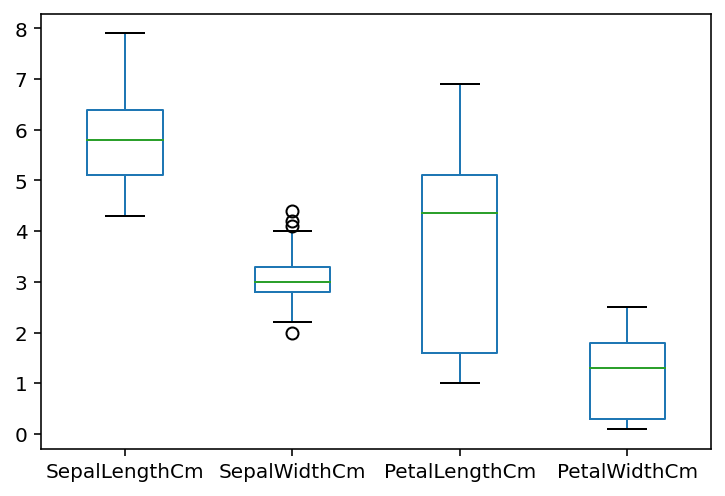

In [6]:
df.plot(kind='box')

#### Better presentation: figure size, add title and legend

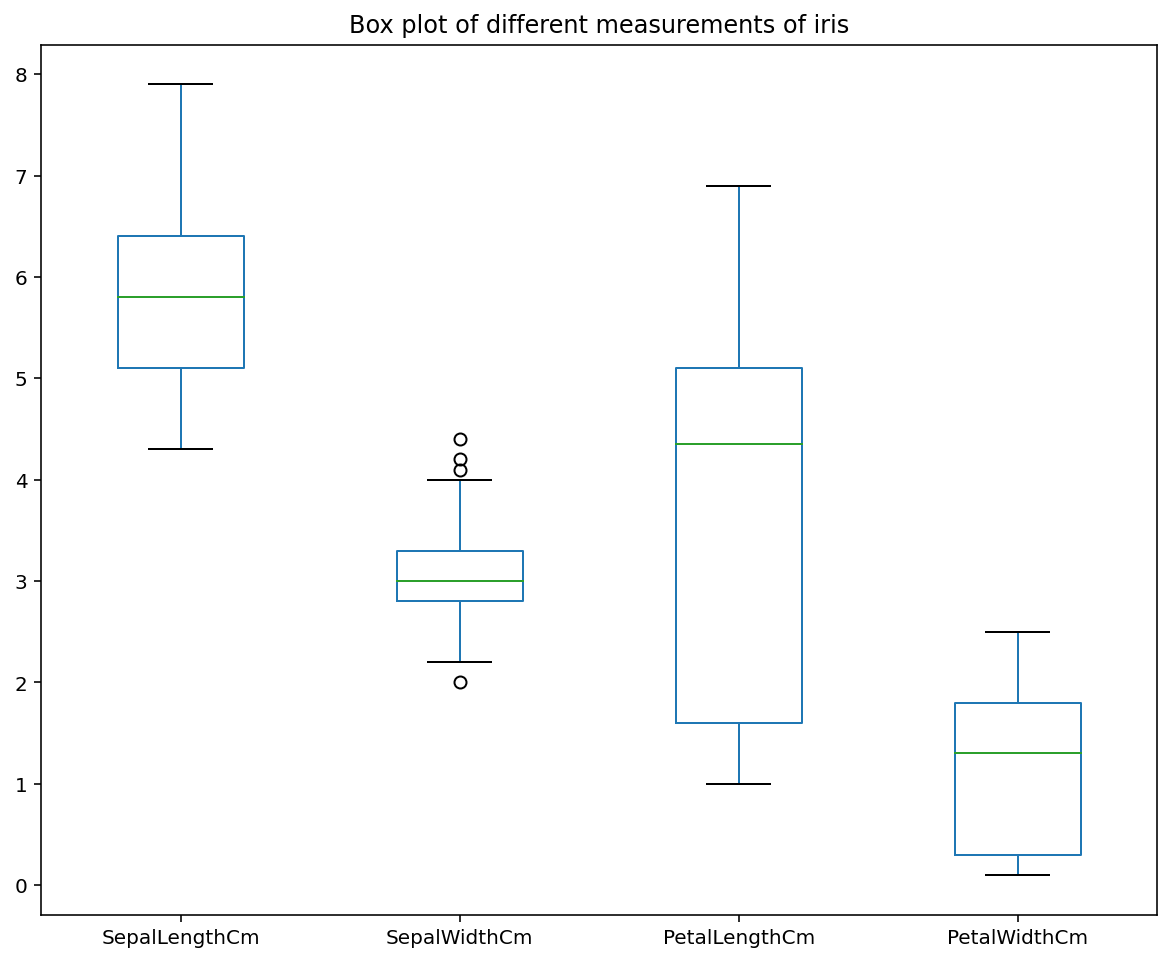

In [7]:
df.plot(kind='box', figsize=(10,8), title='Box plot of different measurements of iris', legend=True)

#### Making subplots

SepalLengthCm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidthCm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidthCm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

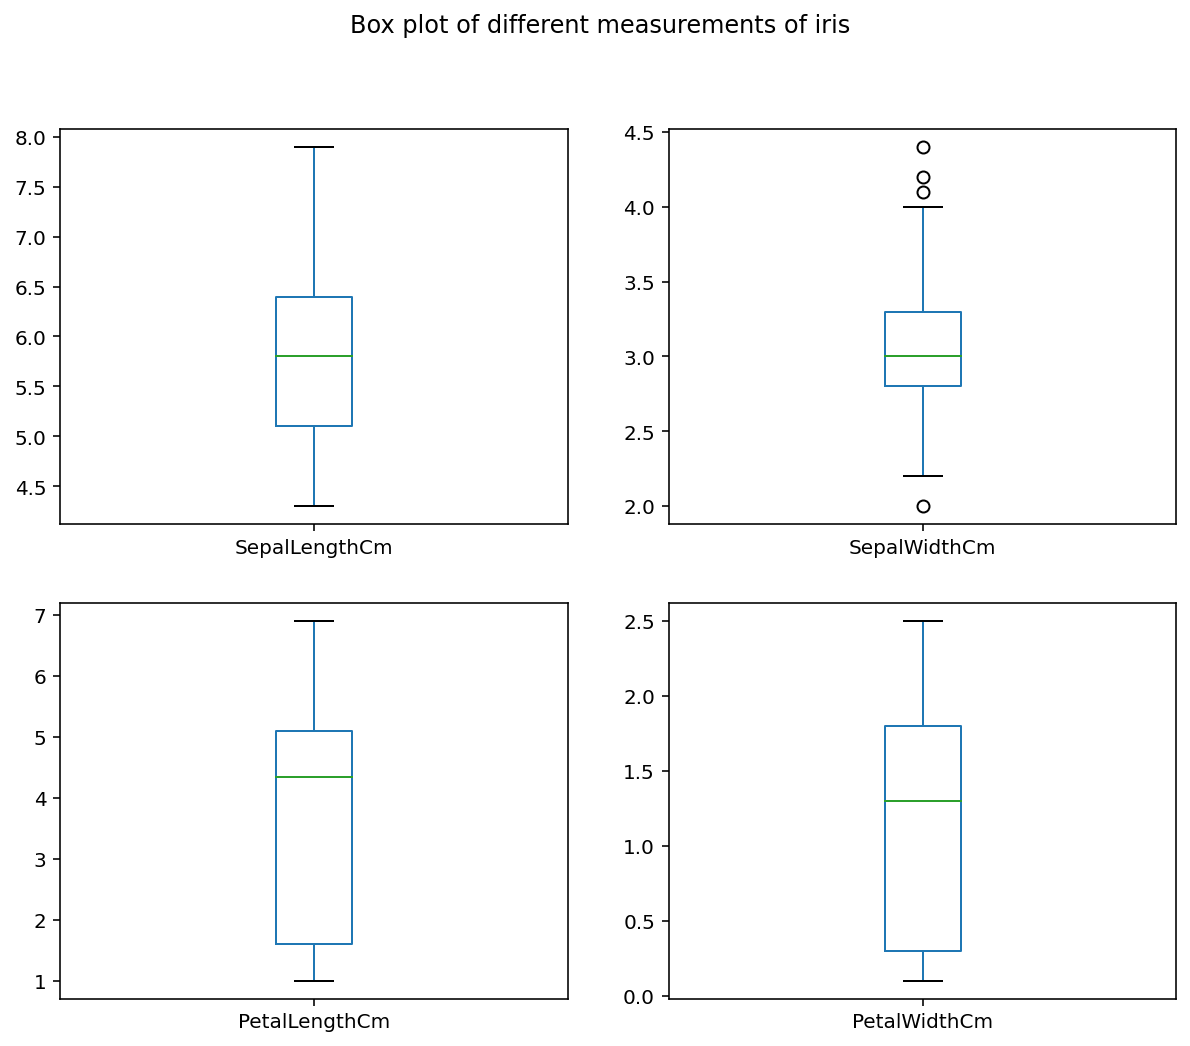

In [8]:
df.plot(kind='box',
        subplots=True, layout=(2,2),
        figsize=(10,8), title='Box plot of different measurements of iris', legend=True)

### Exercise: Compare sepal length of different iris

Let's use box plot to compare the sepal length of different iris. We need the DataFrame to be slightly different so we can compare the different type iris. We would like to pivot the data so each column are sepal length of different iris.

####  Prepare the data set

In [9]:
df_pivot = df.pivot(index=None, columns='Species', values='SepalLengthCm')
# tell the pivot() method to make the 'Species' as columns, and using the 'SepalLengthCm' as the value

In [10]:
df_pivot.head()

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,
1,5.1,NaN,NaN
2,4.9,NaN,NaN
3,4.7,NaN,NaN
4,4.6,NaN,NaN
5,5.0,NaN,NaN


#### Box plot of df_pivot

Now we can use `plot()` on `df_pivot`. To make a box plot, remember to set the parameter `kind` to 'box'. Also make the presentation nice by setting a good `figsize` and with a good `title`. Don't forget the `legend`

#### Addtional exercise

Challenge yourself by making your own `df_pivot` pivoting on a different messure (e.g. Petal Width). Also try usng a histogram (hist) instead of a boxplot. You can also try making a plot with 3 subplots, each is a histrogram of a type of iris.

So far we are not using `matplotlib.pyplot` directly. Although it is very convinent to use `df.plot()`, sometimes we would like to have more control with what we are plotting and make more complex graphs. In the following sections, we will use `matplotlib.pyplot` (which is imported as `plt` now) directly

### Divide the data into 3 types accordingly

In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df_setosa = df[df['Species'] == 'Iris-setosa']

In [13]:
df_versicolor = df[df['Species'] == 'Iris-versicolor']

In [14]:
df_virginica = df[df['Species'] == 'Iris-virginica']

### Scatter plot example: plot on Sepal Length and Width

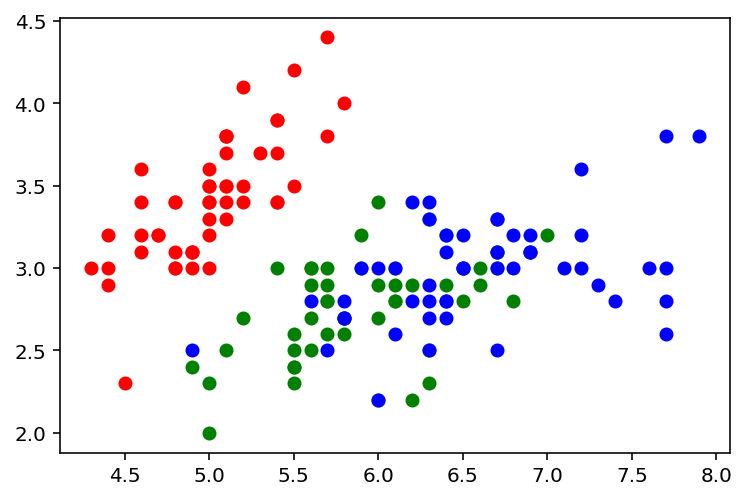

In [15]:
plt.scatter(df_setosa['SepalLengthCm'], df_setosa['SepalWidthCm'], c='r')
plt.scatter(df_versicolor['SepalLengthCm'], df_versicolor['SepalWidthCm'], c='g')
plt.scatter(df_virginica['SepalLengthCm'], df_virginica['SepalWidthCm'], c='b')

#### Better presentation: figure size, add labels and legend

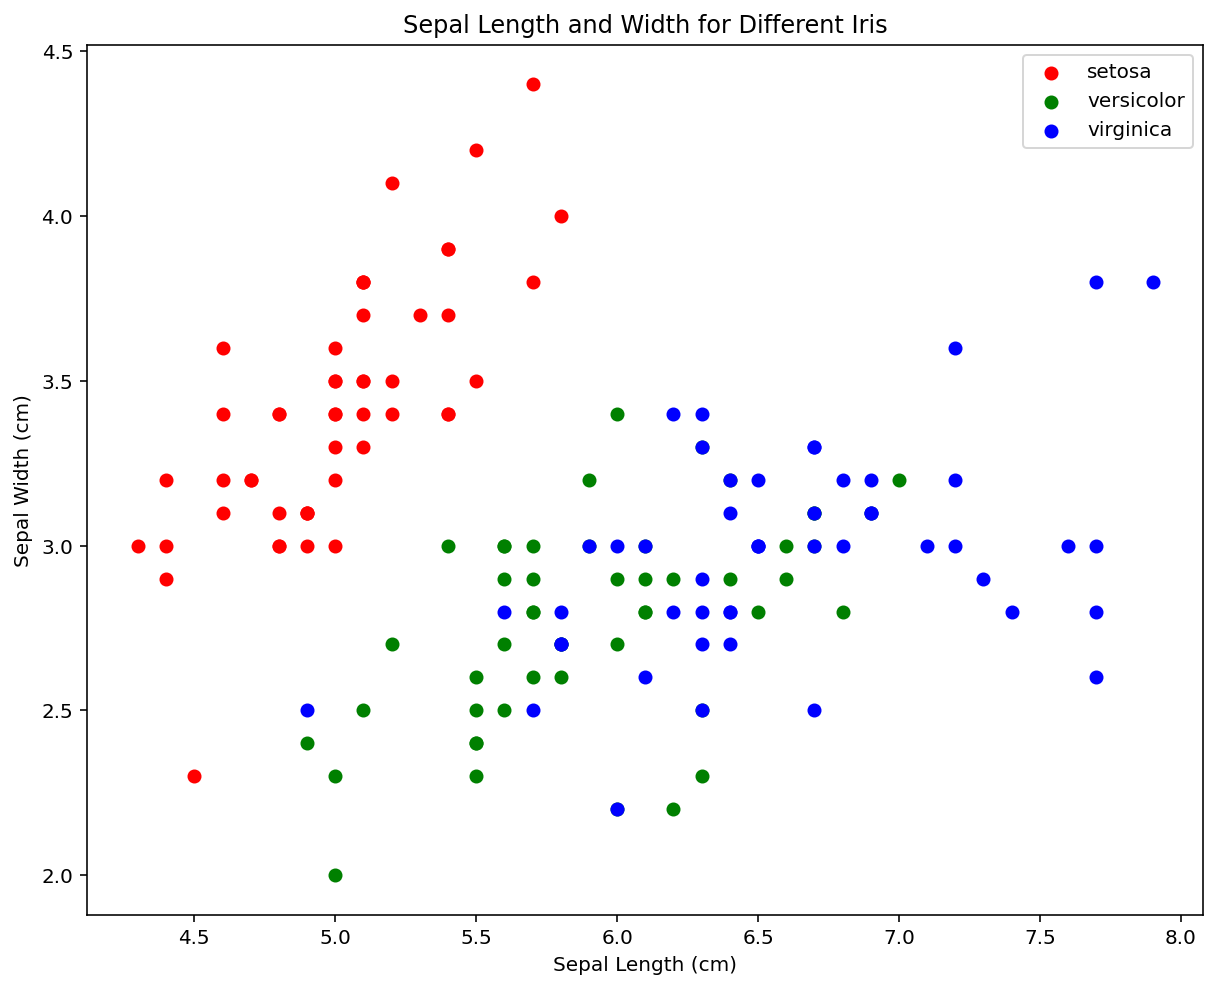

In [16]:
plt.figure(figsize=(10,8)) # set the size of the plot

plt.scatter(df_setosa['SepalLengthCm'], df_setosa['SepalWidthCm'], c='r')
plt.scatter(df_versicolor['SepalLengthCm'], df_versicolor['SepalWidthCm'], c='g')
plt.scatter(df_virginica['SepalLengthCm'], df_virginica['SepalWidthCm'], c='b')

ax = plt.gca() #gca method tell the rest of the code to reference the plot we made

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('Sepal Length and Width for Different Iris')

ax.legend(('setosa', 'versicolor', 'virginica'))

### Scatter plot exercise: plot on Petal Length and Width

Now is your turn to make your own plot. Make sure you have also set the labels and legend

### Histogram example: plot on Sepal Length

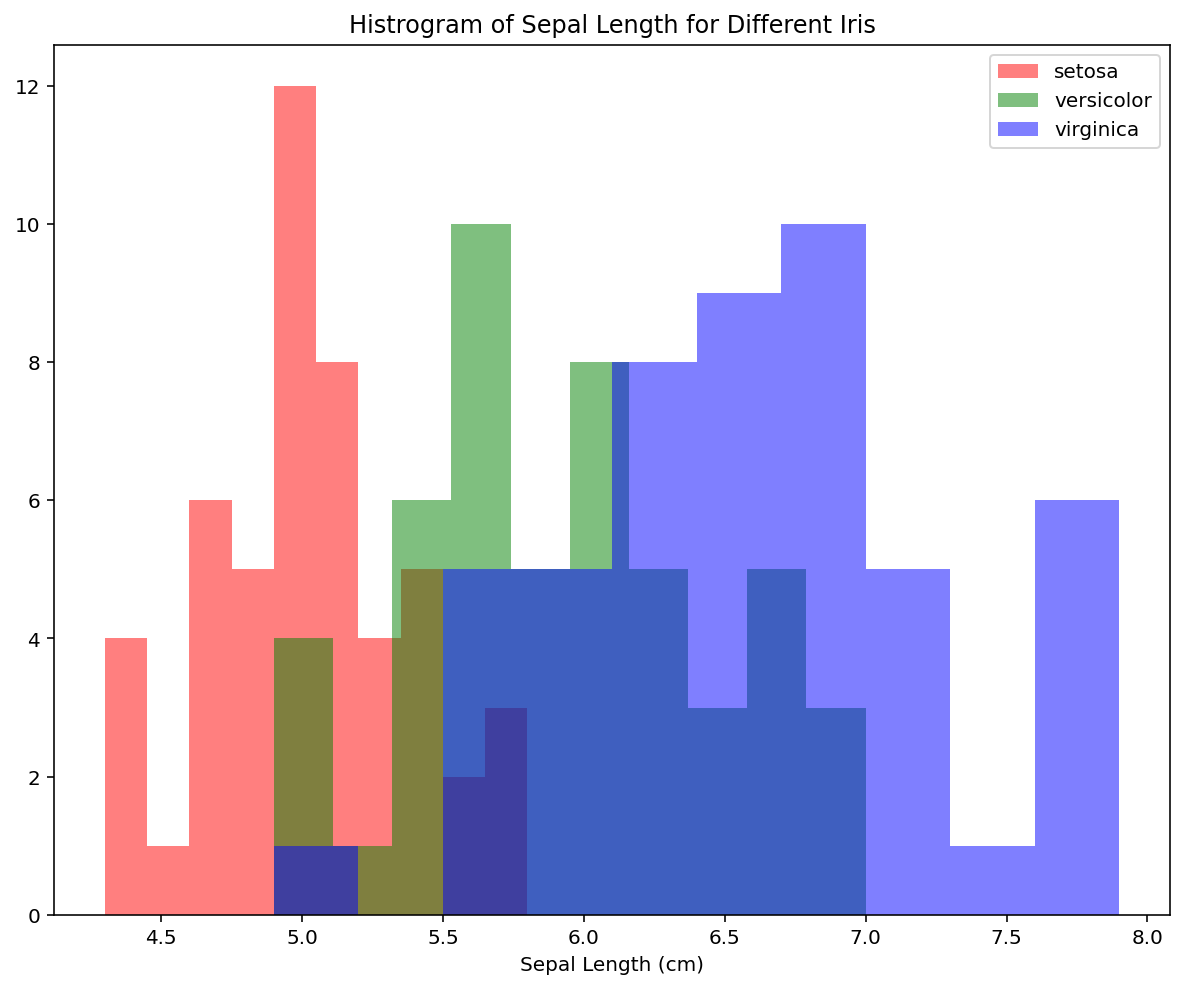

In [17]:
plt.figure(figsize=(10,8))

plt.hist(df_setosa['SepalLengthCm'], color='r', alpha=.5) # alpha set the transperancy of the plot
plt.hist(df_versicolor['SepalLengthCm'], color='g', alpha=.5)
plt.hist(df_virginica['SepalLengthCm'], color='b', alpha=.5)

ax = plt.gca()

ax.set_xlabel('Sepal Length (cm)')
ax.set_title('Histrogram of Sepal Length for Different Iris')

ax.legend(('setosa', 'versicolor', 'virginica'))

### Histrogram exercise: plot on Petal Width

Now is your turn to make your own plot. Make sure you set the alpha to a proper value and have the right the labels and legend.

### Making subplots example

To make subplots with just `plt` is a bit more complicated. It is considered more advance and require some understanding of what the building blocks are in a plot. Don't feel bad if you find it challenging, you can always follow the example and try it yourself to understand more what is going on.

The example below plot the histrogram of Sepal Length and Sepal Width side by side

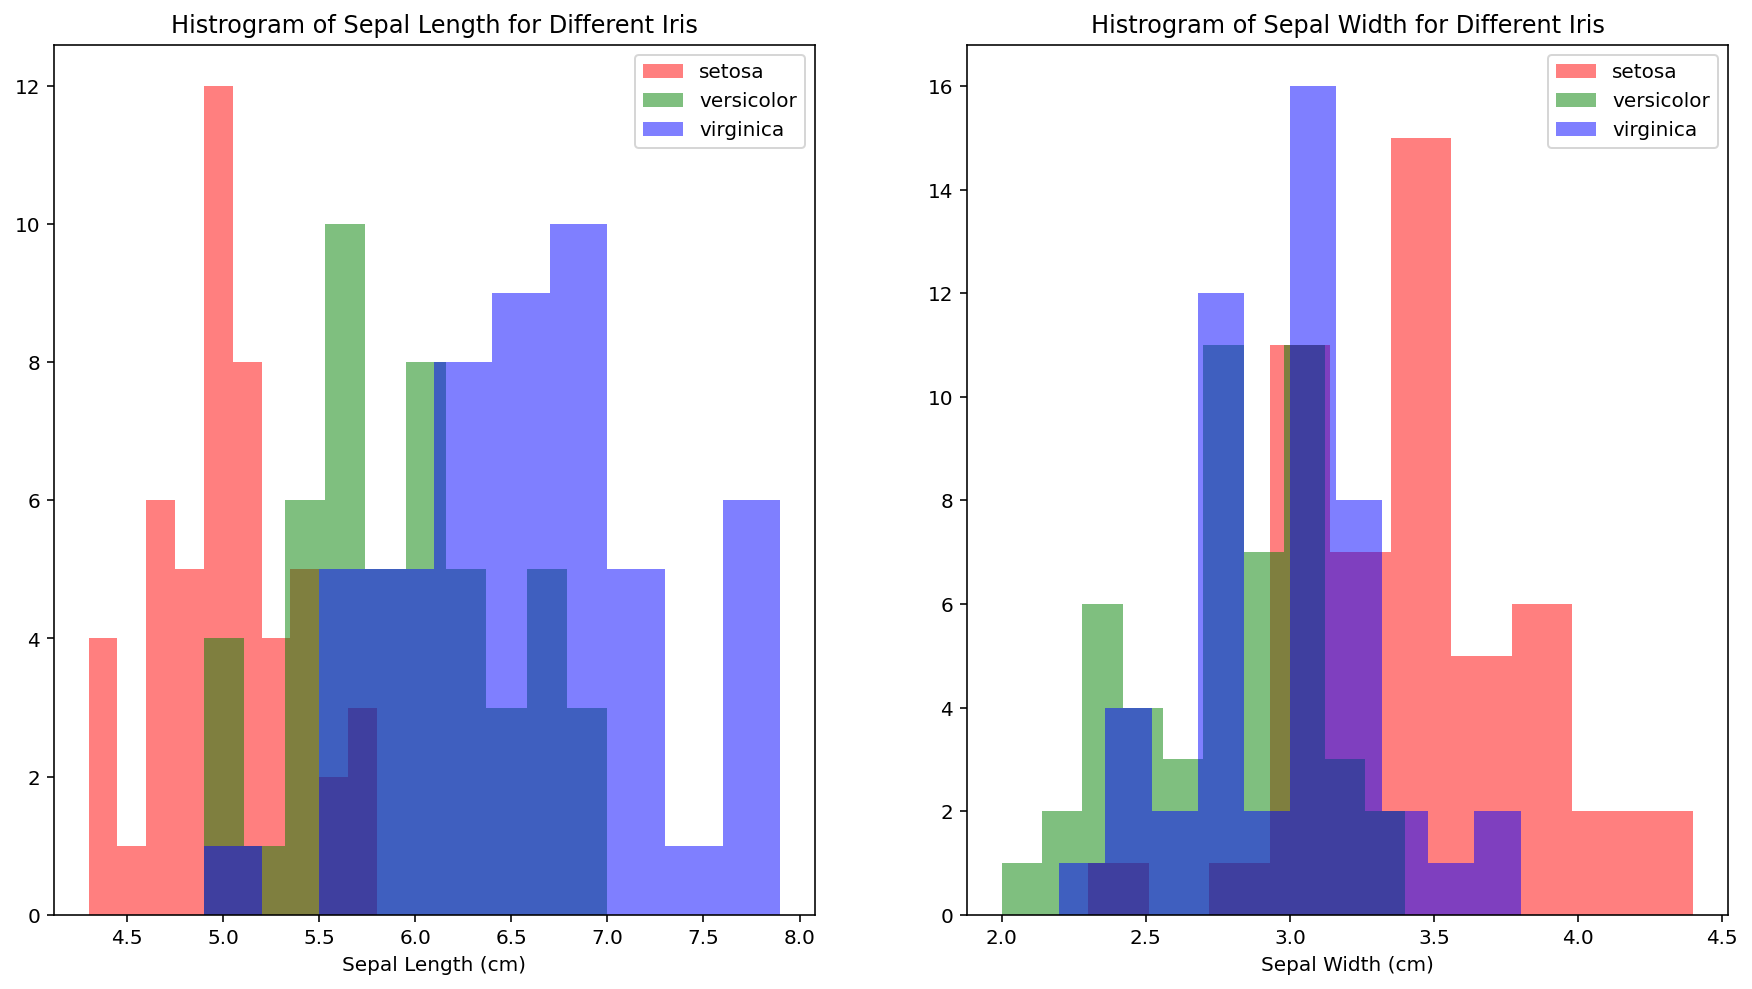

In [18]:
# First, we have to decide how many subplots we want and how they are orientated
# say we want them side by side (i.e. 1 row 2 columns)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# this will create a figure object (which is the whole plot area)
# and 2 axes (which are the 2 subplots labeled ax0 and ax1)

# Now we can put plots in them accordingly

### for ax0 ###

ax0.hist(df_setosa['SepalLengthCm'], color='r', alpha=.5) 
ax0.hist(df_versicolor['SepalLengthCm'], color='g', alpha=.5)
ax0.hist(df_virginica['SepalLengthCm'], color='b', alpha=.5)

ax0.set_xlabel('Sepal Length (cm)')
ax0.set_title('Histrogram of Sepal Length for Different Iris')

ax0.legend(('setosa', 'versicolor', 'virginica'))

### for ax1 ###

ax1.hist(df_setosa['SepalWidthCm'], color='r', alpha=.5) 
ax1.hist(df_versicolor['SepalWidthCm'], color='g', alpha=.5)
ax1.hist(df_virginica['SepalWidthCm'], color='b', alpha=.5)

ax1.set_xlabel('Sepal Width (cm)')
ax1.set_title('Histrogram of Sepal Width for Different Iris')

ax1.legend(('setosa', 'versicolor', 'virginica'))

plt.show() # after building what we want for both axes, use show() method to show plots

### Making subplots exercise

Make 2 subplots, one on top of another. They are scatter plots of Petal Length and Petal Width (with different type of iris). After you have done it, try also other orientation and plots. See if you can make 4 subplots together. Always make sure the presentation is good.

#### Note on advance material

Check out more example of histogram with multiple data sets: https://matplotlib.org/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py

Example: Creates histogram from scatter plot and adds them to the sides of the plot
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

There are a lot more to learn about matplotlib. It is a very powerful library. You can always learn more by looking at the examples at: https://matplotlib.org/gallery/index.html

Also, if you are stucked, always check the documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot